# Tarea semanal 11
## Martín Deleón

### Consignas:

En esta tarea se solicitó la resolución de los siguientes ejercicios:

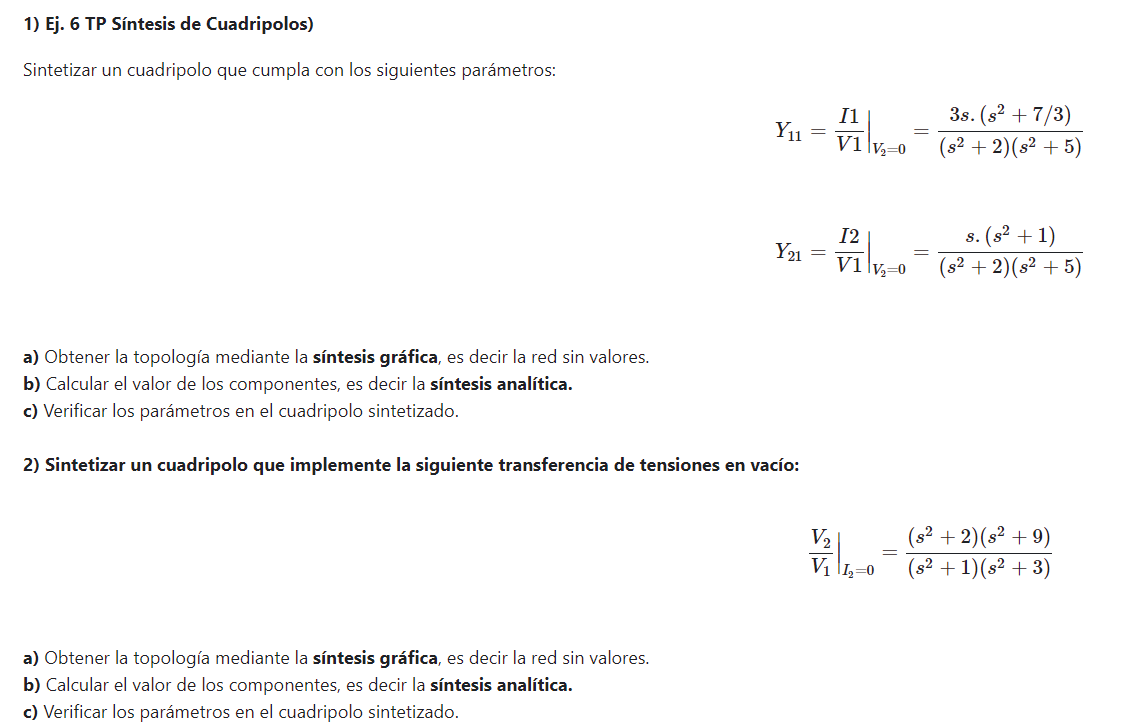

### Análisis en papel

In [47]:
from IPython.display import IFrame
IFrame("NOMBRE DEL ARCHIVO", width= 1000, height= 800)

Ahora realizamos una simulación en python para comparar los resultados obtenidos en el papel.

In [48]:
from pytc2.sintesis_dipolo import remover_polo_dc, remover_polo_infinito
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_polo_jw, remover_valor_en_infinito, remover_valor_en_dc, remover_polo_sigma
import math
import sympy as sp
import numpy as np

### Ejercicio 1

In [49]:
s = sp.symbols('s', complex = True)

Y11 = (3*s*(s**2 + 7/3))/((s**2 + 2)*(s**2 + 5))
Y11 = sp.nsimplify(Y11)

print_latex(a_equal_b_latex_s('Y11(s)', Y11))

<IPython.core.display.Math object>

In [50]:
Z1, K1 = remover_polo_infinito(1/Y11)

print_latex(a_equal_b_latex_s('K1', K1))
print_latex(a_equal_b_latex_s('Z1(s)', Z1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

De la remoción anterior vemos que tenemos un residuo de valor $\frac{1}{3}$ tal como se obtuvo en el desarrollo en papel.

In [51]:
#Pasamos a admitancia y retiramos polo en DC
Z2, K2 = remover_polo_dc(Z1, omega_zero = 1)

print_latex(a_equal_b_latex_s('K2', K2))
print_latex(a_equal_b_latex_s('Z2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

En este caso se removió parcialmente un capacitor en serie para poder lograr una frecuencia de resonancia en $ jw = 1$. Ahora continuamos removiendo en esta frecuencia para lograr un cero en $Y12$.

In [52]:
Y3, K3, L2, C2 = remover_polo_jw(1/Z2, omega = 1, isImpedance = False, omega_zero = None)
K3 = sp.nsimplify(K3)

print_latex(a_equal_b_latex_s('L2', L2))
print_latex(a_equal_b_latex_s('C2', C2))
print_latex(a_equal_b_latex_s('K3', K3))
print_latex(a_equal_b_latex_s('Y3(s)', Y3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego de este proceso de remoción podemos ver que todos los resultados obtenidos en papel verifican los simulados en esta sección.
Para comparar estos resultados con otro método, podemos armar el circuito en LtSpice y simularlo. De esta forma obtenemos las siguientes gráficas.

Circuito:

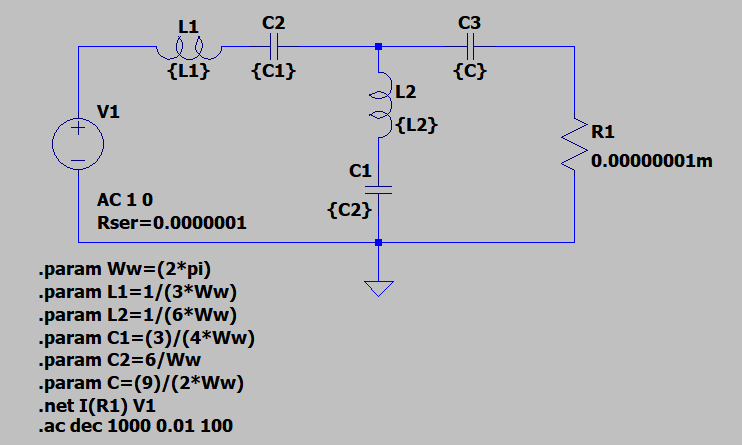

Parámetro Y11:

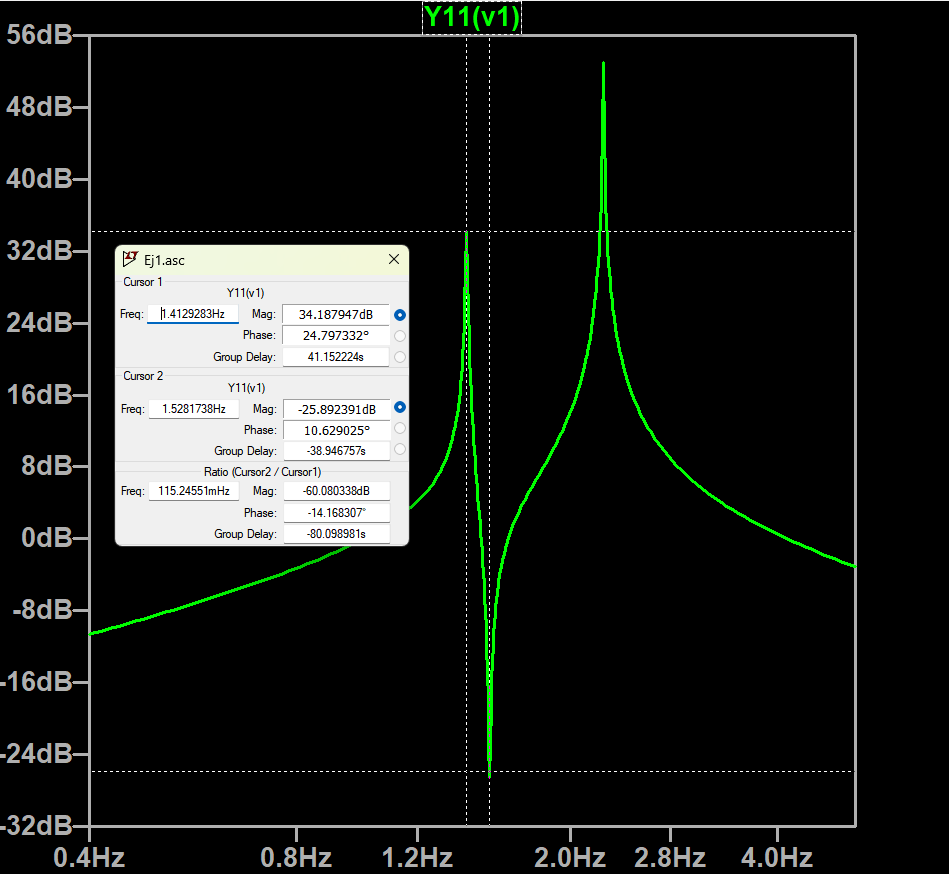

En esta imágen se puede ver en los cursores la frecuencia de un cero y un polo, los cuales coinciden con lo calculado tanto en papel como en la simulación númerica.

Parámetro Y21:

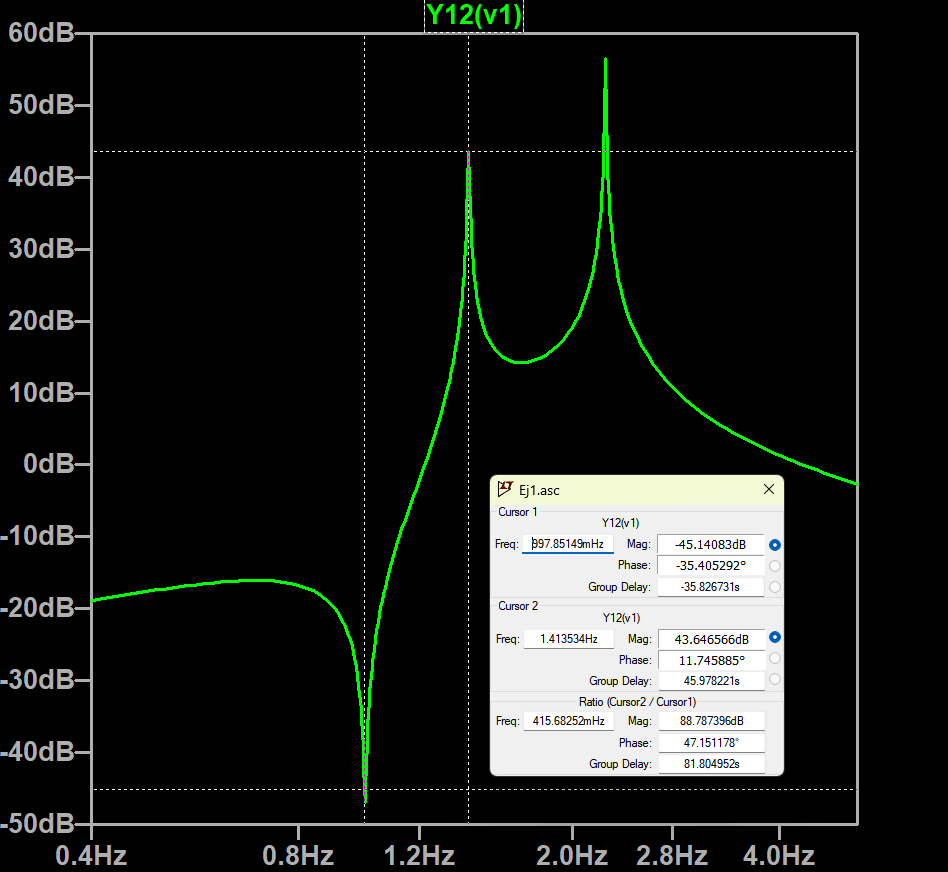

En este caso las frecuencias tambien coinciden y algo que es destacable de observar es la tendencia tanto en alta como en baja frecuencia. Esta tambien cumple con lo calculado.



### Ejercicio 2

In [53]:
Z11 = ((s**2 + 1)*(s**2 + 3))/(s*(s**2 + sp.Rational(3/2)))
#Z11 = sp.nsimplify(Z11)

#Para este ejercicio se propuso el siguiente D
D = (s*(s**2 + 3/2))
D = sp.nsimplify(D)

print_latex(a_equal_b_latex_s('D(s)', D))
print_latex(a_equal_b_latex_s('Z11(s)', Z11))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [54]:
#Z2, K2 = remover_polo_dc(Z1, omega_zero = 1)
# Retiramos un poco del polo en infinito
Z2, K1 = remover_polo_infinito(Z11, omega_zero= 3)
print_latex(a_equal_b_latex_s('K1', K1))
print_latex(a_equal_b_latex_s('Z2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
Y3, K2, L2, C2= remover_polo_jw(1/Z2, isImpedance= False, omega=3, omega_zero= None)
sp.simplify(K2)
print_latex(a_equal_b_latex_s('L2', L2))
print_latex(a_equal_b_latex_s('C2', C2))
print_latex(a_equal_b_latex_s('K2', K2))
print_latex(a_equal_b_latex_s('Y3(s)', Y3))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
Z3 = 1/Y3
Z4, K3 = remover_polo_infinito(Z3, omega_zero= 1.414213562)
Zp = Z3 - 2.77037037*s
Zp = sp.simplify(Zp)
# No puedo hacer que me de numeros lindos, ni usando sp.Rational. De todas formas el polinomio verifica
Z4 = (s**2 + 2)/s
print_latex(a_equal_b_latex_s('Zp',  Zp))
print_latex(a_equal_b_latex_s('k3', K3))
print_latex(a_equal_b_latex_s('Z4',  Z4))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
Y5, K4, L3, C3 = remover_polo_jw(1/Z4, omega= 1.414213562, isImpedance= False, omega_zero= None)

print_latex(a_equal_b_latex_s('K4', K4))
print_latex(a_equal_b_latex_s('Y5', Y5))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Para este ejercicio no entiendo que es lo que pasa. La simulación en spice da cualquier cosa, no tiene relación con lo calculado tanto en papel como en python, ya no se como seguir.
Consultare en clase, pero esta imágen dice que estoy haciendo algo mal, porque no puedo tener un parametro transferencia con un polo en infinito, mas allá de que los ceros tampoco coinciden.

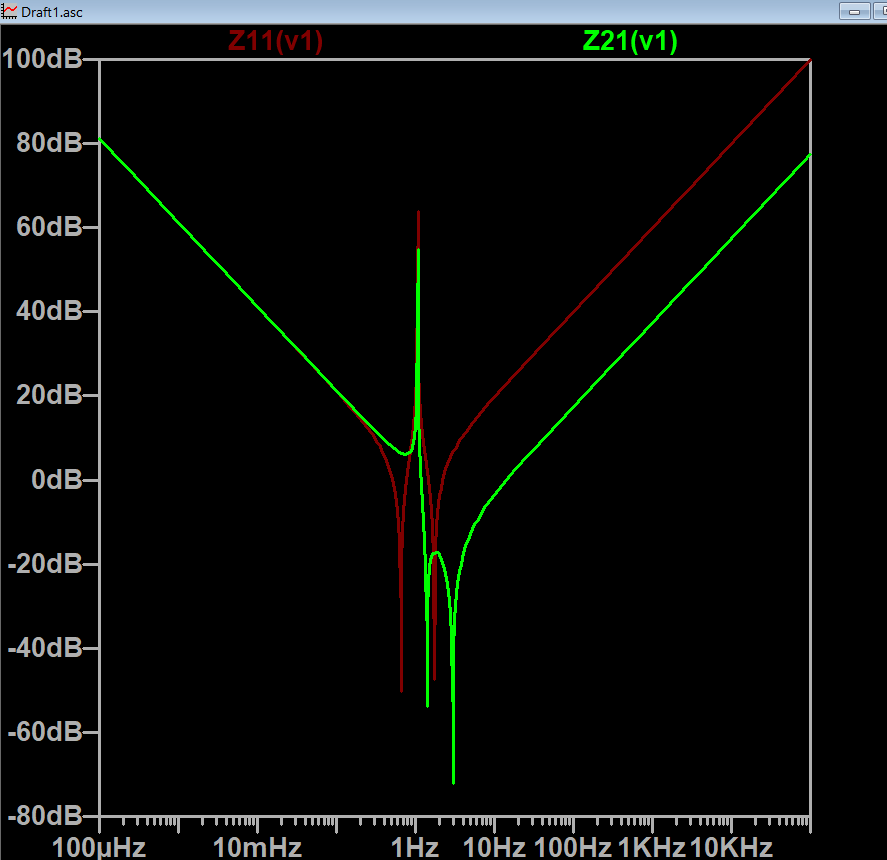